In [1]:
from pathlib import Path
import datajoint as dj

dj.config.load(
    Path("../dj_local_conf.json").absolute()
)  # load config for database connection info

# MUA Analysis and Detection

NOTE: This notebook is a work in progress. It is not yet complete and may contain errors.

In [2]:
from spyglass.spikesorting.spikesorting_merge import SpikeSortingOutput
import spyglass.spikesorting.v1 as sgs


nwb_copy_file_name = "mediumnwb20230802_.nwb"

sorter_keys = {
    "nwb_file_name": nwb_copy_file_name,
    "sorter": "clusterless_thresholder",
    "sorter_param_name": "default_clusterless",
}

(sgs.SpikeSortingSelection & sorter_keys) * SpikeSortingOutput.CurationV1

[2024-01-29 13:51:25,319][INFO]: Connecting root@localhost:3306
[2024-01-29 13:51:25,405][INFO]: Connected root@localhost:3306
[13:51:26][WARNING] Spyglass: Please update position_tools to >= 0.1.0


sorting_id,merge_id,recording_id,sorter,sorter_param_name,nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,curation_id
08a302b6-5505-40fa-b4d5-62162f8eef58,485a4ddf-332d-35b5-3ad4-0561736c1844,449b64e3-db0b-437e-a1b9-0d29928aa2dd,clusterless_thresholder,default_clusterless,mediumnwb20230802_.nwb,45f6b9a1-eef3-46eb-866d-d0999afebda6,0
0ca508ee-af4c-4a89-8181-d48bd209bfd4,6acb99b8-6a0c-eb83-1141-5f603c5895e0,328da21c-1d9c-41e2-9800-76b3484b707b,clusterless_thresholder,default_clusterless,mediumnwb20230802_.nwb,686d9951-1c0f-4d5e-9f5c-09e6fd8bdd4c,0
209dc048-6fae-4315-b293-c06fff29f947,f7237e18-4e73-4aee-805b-90735e9147de,aff78f2f-2ba0-412a-95cc-447c3a2f4683,clusterless_thresholder,default_clusterless,mediumnwb20230802_.nwb,719e8a86-fcf1-4ffc-8c1f-ea912f67ad5d,0
21a9a593-f6f3-4b82-99d7-8fc46556eff3,7e3fa66e-727e-1541-819a-b01309bb30ae,2402805a-04f9-4a88-9ccf-071376c8de19,clusterless_thresholder,default_clusterless,mediumnwb20230802_.nwb,d581b117-160e-4311-b096-7781a4de4394,0
406a20e3-5a9f-4fec-b046-a6561f72461e,6d039a63-17ad-0b78-4b1e-f02d5f3dbbc5,f1427e00-2974-4301-b2ac-b4dc29277c51,clusterless_thresholder,default_clusterless,mediumnwb20230802_.nwb,0e848c38-9105-4ea4-b6ba-dbdd5b46a088,0
4131c51b-c56d-41fa-b046-46635fc17fd9,e0e9133a-7a4e-1321-a43a-e8afcb2f25da,9e332d82-1daf-4e92-bb50-12e4f9430875,clusterless_thresholder,default_clusterless,mediumnwb20230802_.nwb,9ed11db5-c42e-491a-8caf-7d9a37a65f13,0
4c5a629a-71d9-481d-ab11-a4cb0fc16087,9959b614-2318-f597-6651-a3a82124d28a,3a2c3eed-413a-452a-83c8-0e4648141bde,clusterless_thresholder,default_clusterless,mediumnwb20230802_.nwb,2b9fbf14-74a0-4294-a805-26702340aac9,0
4d629c07-1931-4e1f-a3a8-cbf1b72161e3,c0eb6455-fc41-c200-b62e-e3ca81b9a3f7,f07bc0b0-de6b-4424-8ef9-766213aaca26,clusterless_thresholder,default_clusterless,mediumnwb20230802_.nwb,5c68f0f0-f577-4905-8a09-e4d171d0a22d,0
554a9a3c-0461-48be-8435-123eed59c228,912e250e-56d8-ee33-4525-c844d810971b,7f128981-6868-4976-ba20-248655dcac21,clusterless_thresholder,default_clusterless,mediumnwb20230802_.nwb,f4b9301f-bc91-455b-9474-c801093f3856,0
7bb007f2-26d3-463f-b7dc-7bd4d271725e,d7d2c97a-0e6e-d1b8-735c-d55dc66a30e1,a9b7cec0-1256-49cf-abf0-8c45fd155379,clusterless_thresholder,default_clusterless,mediumnwb20230802_.nwb,74270cba-36ee-4afb-ab50-2a6cc948e68c,0


In [3]:
spikesorting_merge_ids = (
    (sgs.SpikeSortingSelection & sorter_keys) * SpikeSortingOutput.CurationV1
).fetch("merge_id")

spikesorting_merge_ids

array([UUID('485a4ddf-332d-35b5-3ad4-0561736c1844'),
       UUID('6acb99b8-6a0c-eb83-1141-5f603c5895e0'),
       UUID('f7237e18-4e73-4aee-805b-90735e9147de'),
       UUID('7e3fa66e-727e-1541-819a-b01309bb30ae'),
       UUID('6d039a63-17ad-0b78-4b1e-f02d5f3dbbc5'),
       UUID('e0e9133a-7a4e-1321-a43a-e8afcb2f25da'),
       UUID('9959b614-2318-f597-6651-a3a82124d28a'),
       UUID('c0eb6455-fc41-c200-b62e-e3ca81b9a3f7'),
       UUID('912e250e-56d8-ee33-4525-c844d810971b'),
       UUID('d7d2c97a-0e6e-d1b8-735c-d55dc66a30e1'),
       UUID('abb92dce-4410-8f17-a501-a4104bda0dcf'),
       UUID('74e10781-1228-4075-0870-af224024ffdc'),
       UUID('8bbddc0f-d6ae-6260-9400-f884a6e25ae8'),
       UUID('614d796c-0b95-6364-aaa0-b6cb1e7bbb83'),
       UUID('b332482b-e430-169d-8ac0-0a73ce968ed7'),
       UUID('86897349-ff68-ac72-02eb-739dd88936e6'),
       UUID('4a712103-c223-864f-82e0-6c23de79cc14'),
       UUID('cf858380-e8a3-49de-c2a9-1a277e307a68'),
       UUID('cc4ee561-f974-f8e5-0ea4-83185263a

In [4]:
from spyglass.spikesorting.unit_inclusion_merge import (
    ImportedUnitInclusionV1,
    UnitInclusionOutput,
)

ImportedUnitInclusionV1().insert_all_units(spikesorting_merge_ids)

UnitInclusionOutput.ImportedUnitInclusionV1() & [
    {"spikesorting_merge_id": id} for id in spikesorting_merge_ids
]

merge_id,spikesorting_merge_id,unit_group_name Name of unit group
39b22078-84fa-d3aa-8ca9-2368603d6a47,0751a1e1-a406-7f87-ae6f-ce4ffc60621c,all units
7bc69ef8-ae89-f30f-c236-56a87a49ed63,485a4ddf-332d-35b5-3ad4-0561736c1844,all units
2f6295c6-ad14-dde0-6b14-ee29bc2ed849,4a712103-c223-864f-82e0-6c23de79cc14,all units
7fa3c0ad-36a8-c14c-d84a-890c6002a457,4a72c253-b3ca-8c13-e615-736a7ebff35c,all units
4b025478-ab06-8e65-ef09-7e32be5a624c,5c53bd33-d57c-fbba-e0fb-55e0bcb85d03,all units
9658d944-1f1f-d467-1f56-bcc32d63e6e8,614d796c-0b95-6364-aaa0-b6cb1e7bbb83,all units
76cb7574-a687-37c9-1045-8e4e5d13a0b0,6acb99b8-6a0c-eb83-1141-5f603c5895e0,all units
87af74fa-a77e-f29b-99f7-f5720aa4816f,6d039a63-17ad-0b78-4b1e-f02d5f3dbbc5,all units
3cccfce5-dad9-61c5-7eee-1c7081837100,74e10781-1228-4075-0870-af224024ffdc,all units
bbddf25f-d810-f586-e3b8-cb96350fbbde,7e3fa66e-727e-1541-819a-b01309bb30ae,all units


In [5]:
from spyglass.spikesorting.unit_inclusion_merge import (
    ImportedUnitInclusionV1,
    UnitInclusionOutput,
)

ImportedUnitInclusionV1().insert_all_units(spikesorting_merge_ids)

UnitInclusionOutput.ImportedUnitInclusionV1() & [
    {"spikesorting_merge_id": id} for id in spikesorting_merge_ids
]

merge_id,spikesorting_merge_id,unit_group_name Name of unit group
39b22078-84fa-d3aa-8ca9-2368603d6a47,0751a1e1-a406-7f87-ae6f-ce4ffc60621c,all units
7bc69ef8-ae89-f30f-c236-56a87a49ed63,485a4ddf-332d-35b5-3ad4-0561736c1844,all units
2f6295c6-ad14-dde0-6b14-ee29bc2ed849,4a712103-c223-864f-82e0-6c23de79cc14,all units
7fa3c0ad-36a8-c14c-d84a-890c6002a457,4a72c253-b3ca-8c13-e615-736a7ebff35c,all units
4b025478-ab06-8e65-ef09-7e32be5a624c,5c53bd33-d57c-fbba-e0fb-55e0bcb85d03,all units
9658d944-1f1f-d467-1f56-bcc32d63e6e8,614d796c-0b95-6364-aaa0-b6cb1e7bbb83,all units
76cb7574-a687-37c9-1045-8e4e5d13a0b0,6acb99b8-6a0c-eb83-1141-5f603c5895e0,all units
87af74fa-a77e-f29b-99f7-f5720aa4816f,6d039a63-17ad-0b78-4b1e-f02d5f3dbbc5,all units
3cccfce5-dad9-61c5-7eee-1c7081837100,74e10781-1228-4075-0870-af224024ffdc,all units
bbddf25f-d810-f586-e3b8-cb96350fbbde,7e3fa66e-727e-1541-819a-b01309bb30ae,all units


In [6]:
from spyglass.spikesorting.unit_inclusion_merge import SortedSpikesGroup

unit_inclusion_merge_ids = (
    UnitInclusionOutput.ImportedUnitInclusionV1
    & [{"spikesorting_merge_id": id} for id in spikesorting_merge_ids]
).fetch("merge_id")

SortedSpikesGroup().create_group(
    group_name="test_group",
    nwb_file_name=nwb_copy_file_name,
    unit_inclusion_merge_ids=unit_inclusion_merge_ids,
)

group_key = {
    "nwb_file_name": nwb_copy_file_name,
    "sorted_spikes_group_name": "test_group",
}

SortedSpikesGroup & group_key

nwb_file_name name of the NWB file,sorted_spikes_group_name
mediumnwb20230802_.nwb,test_group


In [7]:
SortedSpikesGroup.Units() & group_key

nwb_file_name name of the NWB file,sorted_spikes_group_name,unit_inclusion_merge_id
mediumnwb20230802_.nwb,test_group,0363fb94-c5de-d653-ed33-1807fa523790
mediumnwb20230802_.nwb,test_group,12da7476-bb70-a4ee-0558-99ca5bcc0958
mediumnwb20230802_.nwb,test_group,151976b9-9dc6-74f6-65d3-23ce96d006d1
mediumnwb20230802_.nwb,test_group,1b7ba376-89f9-e0ac-9104-fbd1bd984e41
mediumnwb20230802_.nwb,test_group,2f6295c6-ad14-dde0-6b14-ee29bc2ed849
mediumnwb20230802_.nwb,test_group,357a0267-874e-04f0-410e-9711f29e1236
mediumnwb20230802_.nwb,test_group,39b22078-84fa-d3aa-8ca9-2368603d6a47
mediumnwb20230802_.nwb,test_group,3cccfce5-dad9-61c5-7eee-1c7081837100
mediumnwb20230802_.nwb,test_group,4b025478-ab06-8e65-ef09-7e32be5a624c
mediumnwb20230802_.nwb,test_group,7591b69d-a902-9058-7597-04632de9e08c


An example of how to get spike times

In [8]:
spike_times = SortedSpikesGroup.fetch_spike_data(group_key)
spike_times[0]

[2024-01-29 13:51:31,631][WARNING]: Skipped checksum for file with hash: 148d9058-e6dc-e959-4c4d-75db9aa0b6e4, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_EF6N6XI3AH.nwb
[2024-01-29 13:51:32,089][WARNING]: Skipped checksum for file with hash: b4b6404f-aaf8-c4cc-9abe-ceea56e103f3, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_O7ZZ0F1XN7.nwb
[2024-01-29 13:51:32,499][WARNING]: Skipped checksum for file with hash: 4357905c-c6b9-3990-4d62-740a54cfc667, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_X84BYVM2B0.nwb
[2024-01-29 13:51:32,924][WARNING]: Skipped checksum for file with hash: ff81d274-17f7-702d-a2b4-92ac43c29316, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_Y2YF504C5D.nwb
[2024-01-29 13:51:33,306][WARNING]: Skipped checksum for file with hash: 8993754e-7dbe-94a1-403d-8c5

array([1.62593570e+09, 1.62593570e+09, 1.62593570e+09, ...,
       1.62593718e+09, 1.62593718e+09, 1.62593718e+09])

In [9]:
from spyglass.position import PositionOutput

position_merge_id = (
    PositionOutput.TrodesPosV1
    & {
        "nwb_file_name": nwb_copy_file_name,
        "interval_list_name": "pos 0 valid times",
        "trodes_pos_params_name": "default_decoding",
    }
).fetch1("merge_id")

position_info = (
    (PositionOutput & {"merge_id": position_merge_id})
    .fetch1_dataframe()
    .dropna()
)
position_info

[13:51:42][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False
[2024-01-29 13:51:42,217][WARNING]: Skipped checksum for file with hash: 0cd40383-03e0-44ec-5dac-36c66063796a, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_FUSH604NQA.nwb


,position_x,position_y,orientation,velocity_x,velocity_y,speed
time,,,,,,
1.625936e+09,183.396148,194.044480,-1.421292,4.893770,-8.354365,9.682170
1.625936e+09,183.414273,194.013538,-1.420984,4.893770,-8.354365,9.682170
1.625936e+09,183.432398,193.982596,-1.420676,4.893770,-8.354365,9.682170
1.625936e+09,183.450524,193.951654,-1.420368,4.893770,-8.354365,9.682170
1.625936e+09,183.468649,193.920712,-1.420059,4.893770,-8.354365,9.682170
...,...,...,...,...,...,...
1.625937e+09,38.376407,113.604645,-1.433903,-0.067077,0.026783,0.072226
1.625937e+09,38.376407,113.610601,-1.434247,-0.080849,0.043172,0.091653
1.625937e+09,38.376407,113.616556,-1.434589,-0.093116,0.058259,0.109840


In [10]:
time_ind_slice = slice(63_000, 70_000)
time = position_info.index[time_ind_slice]

SortedSpikesGroup.get_spike_indicator(group_key, time)

[2024-01-29 13:51:42,682][WARNING]: Skipped checksum for file with hash: 148d9058-e6dc-e959-4c4d-75db9aa0b6e4, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_EF6N6XI3AH.nwb
[2024-01-29 13:51:43,058][WARNING]: Skipped checksum for file with hash: b4b6404f-aaf8-c4cc-9abe-ceea56e103f3, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_O7ZZ0F1XN7.nwb
[2024-01-29 13:51:43,392][WARNING]: Skipped checksum for file with hash: 4357905c-c6b9-3990-4d62-740a54cfc667, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_X84BYVM2B0.nwb
[2024-01-29 13:51:43,770][WARNING]: Skipped checksum for file with hash: ff81d274-17f7-702d-a2b4-92ac43c29316, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_Y2YF504C5D.nwb
[2024-01-29 13:51:44,190][WARNING]: Skipped checksum for file with hash: 8993754e-7dbe-94a1-403d-8c5

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

[2024-01-29 13:51:51,323][WARNING]: Skipped checksum for file with hash: 148d9058-e6dc-e959-4c4d-75db9aa0b6e4, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_EF6N6XI3AH.nwb
[2024-01-29 13:51:51,656][WARNING]: Skipped checksum for file with hash: b4b6404f-aaf8-c4cc-9abe-ceea56e103f3, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_O7ZZ0F1XN7.nwb
[2024-01-29 13:51:52,034][WARNING]: Skipped checksum for file with hash: 4357905c-c6b9-3990-4d62-740a54cfc667, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_X84BYVM2B0.nwb
[2024-01-29 13:51:52,374][WARNING]: Skipped checksum for file with hash: ff81d274-17f7-702d-a2b4-92ac43c29316, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_Y2YF504C5D.nwb
[2024-01-29 13:51:52,694][WARNING]: Skipped checksum for file with hash: 8993754e-7dbe-94a1-403d-8c5

Text(0.5, 0, 'time (s)')

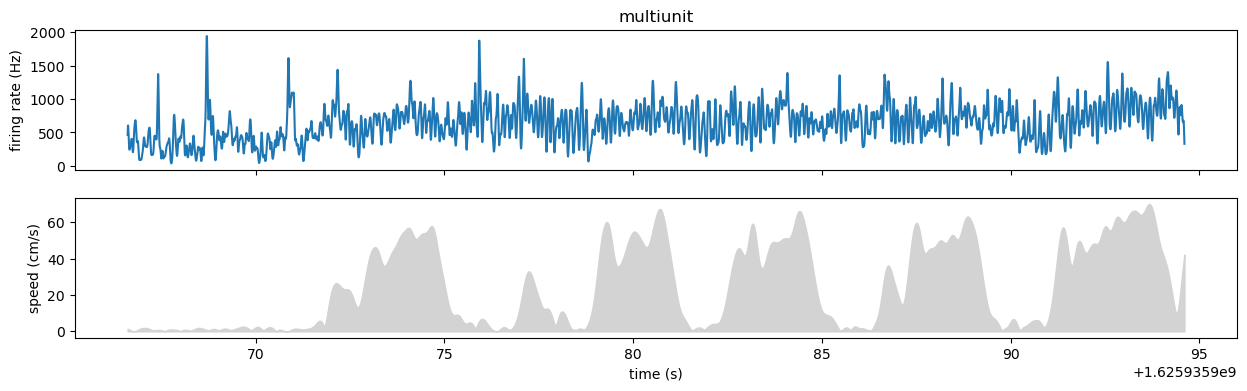

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 4))
multiunit_firing_rate = SortedSpikesGroup.get_firing_rate(
    group_key, time, multiunit=True
)
axes[0].plot(
    time,
    multiunit_firing_rate,
)
axes[0].set_ylabel("firing rate (Hz)")
axes[0].set_title("multiunit")
axes[1].fill_between(
    time, position_info["speed"].iloc[time_ind_slice], color="lightgrey"
)
axes[1].set_ylabel("speed (cm/s)")
axes[1].set_xlabel("time (s)")

In [12]:
from spyglass.mua.v1.mua import MuaEventsParameters, MuaEventsV1

MuaEventsParameters().insert_default()
MuaEventsParameters()

mua_param_name a name for this set of parameters,mua_param_dict dictionary of parameters
default,=BLOB=


In [13]:
selection_key = {
    "mua_param_name": "default",
    "nwb_file_name": nwb_copy_file_name,
    "sorted_spikes_group_name": "test_group",
    "pos_merge_id": position_merge_id,
    "artifact_interval_list_name": "test_artifact_times",
}

MuaEventsV1.populate(selection_key)

[13:51:59][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False
[2024-01-29 13:52:00,002][WARNING]: Skipped checksum for file with hash: 0cd40383-03e0-44ec-5dac-36c66063796a, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_FUSH604NQA.nwb
[2024-01-29 13:52:00,421][WARNING]: Skipped checksum for file with hash: 148d9058-e6dc-e959-4c4d-75db9aa0b6e4, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_EF6N6XI3AH.nwb
[2024-01-29 13:52:00,785][WARNING]: Skipped checksum for file with hash: b4b6404f-aaf8-c4cc-9abe-ceea56e103f3, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_O7ZZ0F1XN7.nwb
[2024-01-29 13:52:01,131][WARNING]: Skipped checksum for file with hash: 4357905c-c6b9-3990-4d62-740a54cfc667, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_X84BY

In [14]:
MuaEventsV1 & selection_key

mua_param_name a name for this set of parameters,nwb_file_name name of the NWB file,sorted_spikes_group_name,pos_merge_id,artifact_interval_list_name descriptive name of this interval list,analysis_file_name name of the file,mua_times_object_id
default,mediumnwb20230802_.nwb,test_group,6dfae23d-6034-e483-06e7-28ab4c29282f,test_artifact_times,mediumnwb20230802_0ADLJ3W6MJ.nwb,56d076f9-8751-4cec-b7b4-21a14058fcff


In [15]:
mua_times = (MuaEventsV1 & selection_key).fetch1_dataframe()
mua_times

[2024-01-29 13:52:11,975][WARNING]: Skipped checksum for file with hash: 6b7e200d-7337-6c3e-ae61-b52ac7b9d6ca, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_0ADLJ3W6MJ.nwb


,start_time,end_time,duration,mean_zscore,median_zscore,max_zscore,min_zscore,speed_at_start,speed_at_end,max_speed,min_speed,median_speed,mean_speed
id,,,,,,,,,,,,,
0,1.625936e+09,1.625936e+09,0.084000,1.250994,1.225517,2.346275,0.026900,2.845775,1.442441,2.845775,1.352343,1.978832,2.010321
1,1.625936e+09,1.625936e+09,0.068000,1.867170,1.994518,3.243124,0.061468,0.287511,0.116674,0.287511,0.116674,0.184148,0.190783
2,1.625936e+09,1.625936e+09,0.128000,1.308437,1.048030,3.013205,0.022677,2.097526,1.261806,2.131399,1.261806,1.945054,1.848956
3,1.625936e+09,1.625936e+09,0.260000,1.847013,2.225766,2.979140,0.028124,0.793993,0.523751,2.196469,0.523751,1.697052,1.616889
4,1.625936e+09,1.625936e+09,0.092000,1.320218,1.367887,2.377142,0.021857,2.139993,1.304687,2.139993,1.142313,1.321552,1.465801
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,1.625937e+09,1.625937e+09,0.228000,5.020090,4.976216,10.539919,0.239889,1.336351,0.441290,1.336351,0.389653,0.828371,0.804487
213,1.625937e+09,1.625937e+09,0.303999,4.870160,4.968471,8.561497,0.129386,0.956787,0.408402,0.966132,0.170895,0.416961,0.540956
214,1.625937e+09,1.625937e+09,0.140000,3.250498,3.146104,6.157476,0.122835,1.745086,2.199006,2.262194,1.745086,2.202081,2.125525


(1625935966.608866, 1625935994.6048138)

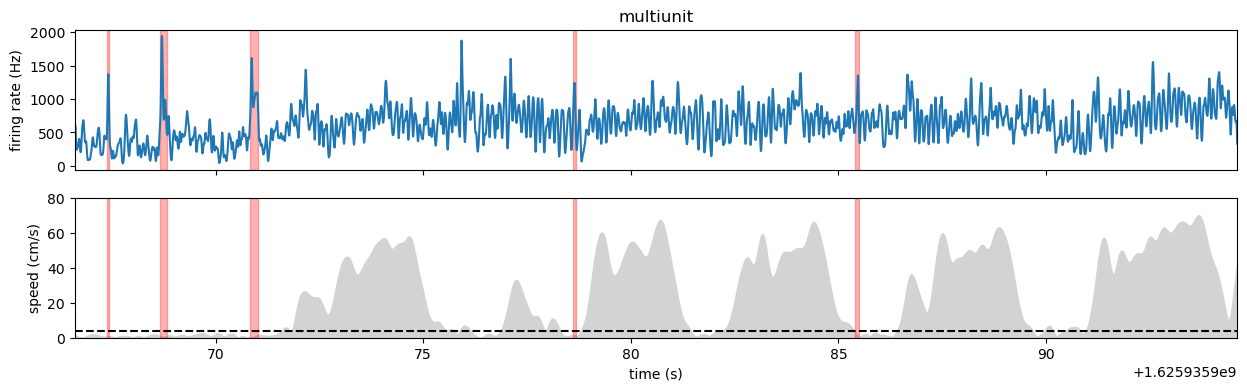

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 4))
axes[0].plot(
    time,
    multiunit_firing_rate,
)
axes[0].set_ylabel("firing rate (Hz)")
axes[0].set_title("multiunit")
axes[1].fill_between(
    time, position_info["speed"].iloc[time_ind_slice], color="lightgrey"
)
axes[1].set_ylabel("speed (cm/s)")
axes[1].set_xlabel("time (s)")

in_bounds = np.logical_and(
    mua_times.start_time >= time[0], mua_times.end_time <= time[-1]
)

for mua_time in mua_times.loc[in_bounds].itertuples():
    axes[0].axvspan(
        mua_time.start_time, mua_time.end_time, color="red", alpha=0.3
    )
    axes[1].axvspan(
        mua_time.start_time, mua_time.end_time, color="red", alpha=0.3
    )
axes[1].set_ylim((0, 80))
axes[1].axhline(4, color="black", linestyle="--")
axes[1].set_xlim((time[0], time[-1]))

In [17]:
from spyglass.common import IntervalList

IntervalList() & {"nwb_file_name": nwb_copy_file_name, "pipeline": "spikesorting_artifact_v1"}

nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,valid_times numpy array with start/end times for each interval,"pipeline type of interval list (e.g. 'position', 'spikesorting_recording_v1')"
mediumnwb20230802_.nwb,0e848c38-9105-4ea4-b6ba-dbdd5b46a088,=BLOB=,spikesorting_artifact_v1
mediumnwb20230802_.nwb,0f91197e-bebb-4dc6-ad41-5bf89c3eed28,=BLOB=,spikesorting_artifact_v1
mediumnwb20230802_.nwb,15c8a3e8-5ce9-4654-891e-6ee4109d6f1a,=BLOB=,spikesorting_artifact_v1
mediumnwb20230802_.nwb,2b93bcd0-7b05-457c-8aab-c41ef543ecf2,=BLOB=,spikesorting_artifact_v1
mediumnwb20230802_.nwb,2b9fbf14-74a0-4294-a805-26702340aac9,=BLOB=,spikesorting_artifact_v1
mediumnwb20230802_.nwb,3a34ab35-eca6-406b-abab-c866a9f41fb9,=BLOB=,spikesorting_artifact_v1
mediumnwb20230802_.nwb,3fecf0af-6ce7-474c-b933-9feb746993a0,=BLOB=,spikesorting_artifact_v1
mediumnwb20230802_.nwb,45f6b9a1-eef3-46eb-866d-d0999afebda6,=BLOB=,spikesorting_artifact_v1
mediumnwb20230802_.nwb,5c68f0f0-f577-4905-8a09-e4d171d0a22d,=BLOB=,spikesorting_artifact_v1
mediumnwb20230802_.nwb,686d9951-1c0f-4d5e-9f5c-09e6fd8bdd4c,=BLOB=,spikesorting_artifact_v1


In [18]:
(sgs.ArtifactDetectionParameters
* sgs.SpikeSortingRecording
* sgs.ArtifactDetectionSelection)

artifact_param_name,recording_id,artifact_id,artifact_params,analysis_file_name name of the file,object_id Object ID for the processed recording in NWB file
none,f1427e00-2974-4301-b2ac-b4dc29277c51,0e848c38-9105-4ea4-b6ba-dbdd5b46a088,=BLOB=,mediumnwb20230802_3BWJOEGAO1.nwb,8366dcfd-bd90-470f-b08c-183bd44dcd1f
none,3c40ebdc-0b61-4105-9971-e1348bd49bc7,0f91197e-bebb-4dc6-ad41-5bf89c3eed28,=BLOB=,mediumnwb20230802_85VG1GLTSR.nwb,2d6e841c-4f98-42b7-9cbf-097fa8ba0766
none,1e3f3707-613e-4a44-93f1-c7e5484112cd,15c8a3e8-5ce9-4654-891e-6ee4109d6f1a,=BLOB=,mediumnwb20230802_H70AAE9UEI.nwb,34550b0b-36c7-4dfb-b1ba-900fc9247da8
none,72f70c5a-bc0f-46cb-b22f-33bafe2315df,2b93bcd0-7b05-457c-8aab-c41ef543ecf2,=BLOB=,mediumnwb20230802_OFQSUAGB74.nwb,3a1b3df6-fa85-4006-ab9b-4bff45680516
none,3a2c3eed-413a-452a-83c8-0e4648141bde,2b9fbf14-74a0-4294-a805-26702340aac9,=BLOB=,mediumnwb20230802_G0STLTBOSC.nwb,ec5170e0-277a-4626-9120-b24574eae650
none,d14ae25a-2796-4203-ba0b-f28768536cbe,3a34ab35-eca6-406b-abab-c866a9f41fb9,=BLOB=,mediumnwb20230802_IG73IGEYPA.nwb,a3406f7e-1137-4c34-8715-e0323d074153
none,76ee4ab3-da3e-4a68-9159-635fbf5f8a04,3fecf0af-6ce7-474c-b933-9feb746993a0,=BLOB=,mediumnwb20230802_LFO7YW7IIA.nwb,cfe309be-3748-4dc8-9c71-81bd5c1067b7
none,449b64e3-db0b-437e-a1b9-0d29928aa2dd,45f6b9a1-eef3-46eb-866d-d0999afebda6,=BLOB=,mediumnwb20230802_R19M5A499A.nwb,68db8ac5-d008-4720-a3f8-162b0671313d
none,f07bc0b0-de6b-4424-8ef9-766213aaca26,5c68f0f0-f577-4905-8a09-e4d171d0a22d,=BLOB=,mediumnwb20230802_GF6Z0P5KYV.nwb,80c14292-a179-4c0f-9ff9-79016038ce95
none,328da21c-1d9c-41e2-9800-76b3484b707b,686d9951-1c0f-4d5e-9f5c-09e6fd8bdd4c,=BLOB=,mediumnwb20230802_YSZXPEGP4X.nwb,623a46f8-be44-434b-8aee-49155070f3f7


In [29]:
SpikeSortingOutput.CurationV1() * (
    sgs.ArtifactDetectionParameters
    * sgs.SpikeSortingRecording
    * sgs.ArtifactDetectionSelection
)

merge_id,artifact_param_name,recording_id,artifact_id,sorting_id,curation_id,artifact_params,analysis_file_name name of the file,object_id Object ID for the processed recording in NWB file
485a4ddf-332d-35b5-3ad4-0561736c1844,none,f15351b3-d8e9-49a1-a306-4f366f1ee535,a5470cef-fc31-4723-9e1b-a024e73ef3b1,08a302b6-5505-40fa-b4d5-62162f8eef58,0,=BLOB=,mediumnwb20230802_JVBY43AQFF.nwb,f639dd9a-fc4f-483e-a9c5-f487ecd11292
485a4ddf-332d-35b5-3ad4-0561736c1844,none,f1427e00-2974-4301-b2ac-b4dc29277c51,0e848c38-9105-4ea4-b6ba-dbdd5b46a088,08a302b6-5505-40fa-b4d5-62162f8eef58,0,=BLOB=,mediumnwb20230802_3BWJOEGAO1.nwb,8366dcfd-bd90-470f-b08c-183bd44dcd1f
485a4ddf-332d-35b5-3ad4-0561736c1844,none,f07bc0b0-de6b-4424-8ef9-766213aaca26,5c68f0f0-f577-4905-8a09-e4d171d0a22d,08a302b6-5505-40fa-b4d5-62162f8eef58,0,=BLOB=,mediumnwb20230802_GF6Z0P5KYV.nwb,80c14292-a179-4c0f-9ff9-79016038ce95
485a4ddf-332d-35b5-3ad4-0561736c1844,none,e59e77e9-dd41-4f58-a75b-17271b78c0d8,8cc7a814-8e4a-4b87-ae71-80ca1f5771b1,08a302b6-5505-40fa-b4d5-62162f8eef58,0,=BLOB=,mediumnwb20230802_8SB3X7Y9YA.nwb,c880110b-1dbf-4cc1-99ff-3766ade81fed
485a4ddf-332d-35b5-3ad4-0561736c1844,none,d14ae25a-2796-4203-ba0b-f28768536cbe,3a34ab35-eca6-406b-abab-c866a9f41fb9,08a302b6-5505-40fa-b4d5-62162f8eef58,0,=BLOB=,mediumnwb20230802_IG73IGEYPA.nwb,a3406f7e-1137-4c34-8715-e0323d074153
485a4ddf-332d-35b5-3ad4-0561736c1844,none,b81f1ed9-fb2e-4f5c-93d8-d9cc0f118875,69f7d164-efc8-4621-b83c-77bc7459dbc2,08a302b6-5505-40fa-b4d5-62162f8eef58,0,=BLOB=,mediumnwb20230802_QBQBH0I2OO.nwb,101d753a-72fb-47a4-8734-962f8ef4f477
485a4ddf-332d-35b5-3ad4-0561736c1844,none,aff78f2f-2ba0-412a-95cc-447c3a2f4683,719e8a86-fcf1-4ffc-8c1f-ea912f67ad5d,08a302b6-5505-40fa-b4d5-62162f8eef58,0,=BLOB=,mediumnwb20230802_42H3PR863Y.nwb,6c5f3cd0-903a-42b5-ad68-261789bfd1a8
485a4ddf-332d-35b5-3ad4-0561736c1844,none,a9b7cec0-1256-49cf-abf0-8c45fd155379,74270cba-36ee-4afb-ab50-2a6cc948e68c,08a302b6-5505-40fa-b4d5-62162f8eef58,0,=BLOB=,mediumnwb20230802_5GUFKQ59T6.nwb,498d52a8-47d1-41c2-bd45-2ac796fce4cd
485a4ddf-332d-35b5-3ad4-0561736c1844,none,a3f5b9e7-7c79-4eb4-b5ed-910191c615c2,f9cc9158-bea2-4de2-811d-1fb895c048a9,08a302b6-5505-40fa-b4d5-62162f8eef58,0,=BLOB=,mediumnwb20230802_OQZ8C41NHS.nwb,d49e9245-149c-4725-bd0f-d69b78e0a33a
485a4ddf-332d-35b5-3ad4-0561736c1844,none,9e332d82-1daf-4e92-bb50-12e4f9430875,9ed11db5-c42e-491a-8caf-7d9a37a65f13,08a302b6-5505-40fa-b4d5-62162f8eef58,0,=BLOB=,mediumnwb20230802_30PFKCH9HH.nwb,a45a4c86-d748-48f8-b406-4da381a74737


In [ ]:
(
    IntervalList()
    & {
        "nwb_file_name": nwb_copy_file_name,
        "pipeline": "spikesorting_artifact_v1",
    }
).proj(artifact_id="interval_list_name")

In [20]:
sgs.SpikeSortingRecording() * sgs.ArtifactDetectionSelection()

recording_id,artifact_id,analysis_file_name name of the file,object_id Object ID for the processed recording in NWB file,artifact_param_name
04f3ecb4-a18c-4ffb-85d8-2f5f62d4d6d4,7a93bd27-5108-4290-89a2-2f8770664b35,mediumnwb20230802_F7HG9E9J3I.nwb,16bded49-3fc2-4e37-9ac6-385eec091740,none
1d2b5966-415a-4c65-955a-0e422d8b5b00,e4921df8-99b5-4f52-b3c2-988b9433e0cf,mediumnwb20230802_C0I26JVUNV.nwb,a07a4fcc-ac84-4d07-a036-b32c7e2ceb28,none
1e3f3707-613e-4a44-93f1-c7e5484112cd,15c8a3e8-5ce9-4654-891e-6ee4109d6f1a,mediumnwb20230802_H70AAE9UEI.nwb,34550b0b-36c7-4dfb-b1ba-900fc9247da8,none
2402805a-04f9-4a88-9ccf-071376c8de19,d581b117-160e-4311-b096-7781a4de4394,mediumnwb20230802_5MEOIHZ5E5.nwb,bf877f6e-5daf-4d70-ab23-fc2b7c132370,none
24107d8c-ce26-4c77-8f6a-bf6955d8a3c7,d1925dc7-e3b0-47ef-adbc-1af129b67048,mediumnwb20230802_MKQ2TG5YZC.nwb,7f55e942-7563-466a-ba56-b82ea5089be4,none
257c077b-8f3b-4abb-a631-6b8084d6a1ea,e289e03d-32ad-461a-a1cc-c88537343149,mediumnwb20230802_C2DEV7V2C6.nwb,c19ca39e-50a4-4e87-a8e7-22ccf5979f27,none
328da21c-1d9c-41e2-9800-76b3484b707b,686d9951-1c0f-4d5e-9f5c-09e6fd8bdd4c,mediumnwb20230802_YSZXPEGP4X.nwb,623a46f8-be44-434b-8aee-49155070f3f7,none
3a2c3eed-413a-452a-83c8-0e4648141bde,2b9fbf14-74a0-4294-a805-26702340aac9,mediumnwb20230802_G0STLTBOSC.nwb,ec5170e0-277a-4626-9120-b24574eae650,none
3c40ebdc-0b61-4105-9971-e1348bd49bc7,0f91197e-bebb-4dc6-ad41-5bf89c3eed28,mediumnwb20230802_85VG1GLTSR.nwb,2d6e841c-4f98-42b7-9cbf-097fa8ba0766,none
449b64e3-db0b-437e-a1b9-0d29928aa2dd,45f6b9a1-eef3-46eb-866d-d0999afebda6,mediumnwb20230802_R19M5A499A.nwb,68db8ac5-d008-4720-a3f8-162b0671313d,none


In [21]:
SpikeSortingOutput.CurationV1() * sgs.SpikeSortingRecording()

merge_id,recording_id,sorting_id,curation_id,analysis_file_name name of the file,object_id Object ID for the processed recording in NWB file
485a4ddf-332d-35b5-3ad4-0561736c1844,f15351b3-d8e9-49a1-a306-4f366f1ee535,08a302b6-5505-40fa-b4d5-62162f8eef58,0,mediumnwb20230802_JVBY43AQFF.nwb,f639dd9a-fc4f-483e-a9c5-f487ecd11292
485a4ddf-332d-35b5-3ad4-0561736c1844,f1427e00-2974-4301-b2ac-b4dc29277c51,08a302b6-5505-40fa-b4d5-62162f8eef58,0,mediumnwb20230802_3BWJOEGAO1.nwb,8366dcfd-bd90-470f-b08c-183bd44dcd1f
485a4ddf-332d-35b5-3ad4-0561736c1844,f07bc0b0-de6b-4424-8ef9-766213aaca26,08a302b6-5505-40fa-b4d5-62162f8eef58,0,mediumnwb20230802_GF6Z0P5KYV.nwb,80c14292-a179-4c0f-9ff9-79016038ce95
485a4ddf-332d-35b5-3ad4-0561736c1844,e59e77e9-dd41-4f58-a75b-17271b78c0d8,08a302b6-5505-40fa-b4d5-62162f8eef58,0,mediumnwb20230802_8SB3X7Y9YA.nwb,c880110b-1dbf-4cc1-99ff-3766ade81fed
485a4ddf-332d-35b5-3ad4-0561736c1844,d14ae25a-2796-4203-ba0b-f28768536cbe,08a302b6-5505-40fa-b4d5-62162f8eef58,0,mediumnwb20230802_IG73IGEYPA.nwb,a3406f7e-1137-4c34-8715-e0323d074153
485a4ddf-332d-35b5-3ad4-0561736c1844,b81f1ed9-fb2e-4f5c-93d8-d9cc0f118875,08a302b6-5505-40fa-b4d5-62162f8eef58,0,mediumnwb20230802_QBQBH0I2OO.nwb,101d753a-72fb-47a4-8734-962f8ef4f477
485a4ddf-332d-35b5-3ad4-0561736c1844,aff78f2f-2ba0-412a-95cc-447c3a2f4683,08a302b6-5505-40fa-b4d5-62162f8eef58,0,mediumnwb20230802_42H3PR863Y.nwb,6c5f3cd0-903a-42b5-ad68-261789bfd1a8
485a4ddf-332d-35b5-3ad4-0561736c1844,a9b7cec0-1256-49cf-abf0-8c45fd155379,08a302b6-5505-40fa-b4d5-62162f8eef58,0,mediumnwb20230802_5GUFKQ59T6.nwb,498d52a8-47d1-41c2-bd45-2ac796fce4cd
485a4ddf-332d-35b5-3ad4-0561736c1844,a3f5b9e7-7c79-4eb4-b5ed-910191c615c2,08a302b6-5505-40fa-b4d5-62162f8eef58,0,mediumnwb20230802_OQZ8C41NHS.nwb,d49e9245-149c-4725-bd0f-d69b78e0a33a
485a4ddf-332d-35b5-3ad4-0561736c1844,9e332d82-1daf-4e92-bb50-12e4f9430875,08a302b6-5505-40fa-b4d5-62162f8eef58,0,mediumnwb20230802_30PFKCH9HH.nwb,a45a4c86-d748-48f8-b406-4da381a74737


In [22]:
IntervalList.insert1({
    "nwb_file_name": nwb_copy_file_name,
    "interval_list_name": "test_artifact_times",
    "valid_times": [],
})

DuplicateError: ("Duplicate entry 'mediumnwb20230802_.nwb-test_artifact_times' for key 'interval_list.PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')